In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn
from sklearn.decomposition import PCA

In [3]:
df = pd.read_excel('/content/Dataset_Abandon_Scolaire.xlsx')

In [4]:
df.head()

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,Abandon
0,21,Femme,89.585023,2,15.826896,Enfants à charge,0
1,20,Homme,70.713068,3,12.829358,Célibataire,0
2,22,Femme,82.122963,1,13.086319,Enfants à charge,0
3,24,Homme,87.408859,3,14.992032,Célibataire,0
4,20,Homme,86.470676,3,12.671649,Marié,0


DATA CLEANING

In [5]:
df.shape

(2000, 7)

In [6]:
df.isna().sum()

,0
Age,0
Sexe,0
Taux_presence,0
Nombre_retards,0
Note_moyenne,0
Situation_familiale,0
Abandon,0


In [7]:
df.describe()

,Age,Taux_presence,Nombre_retards,Note_moyenne,Abandon
count,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000
mean,20.5930,84.637016,2.593500,13.441019,0.084000
std,2.0133,7.921973,1.788255,1.809283,0.277457
min,14.0000,59.586369,0.000000,7.615012,0.000000
25%,19.0000,79.279829,1.000000,12.268147,0.000000
50%,21.0000,84.813868,3.000000,13.470242,0.000000
75%,22.0000,90.169016,4.000000,14.688037,0.000000
max,28.0000,100.000000,9.000000,18.833574,1.000000


In [8]:
valeur_sexe = df['Sexe'].unique()
valeur_situation_familiale = df['Situation_familiale'].unique()
print(valeur_sexe, valeur_situation_familiale)

['Femme' 'Homme'] ['Enfants à charge' 'Célibataire' 'Marié' 'Divorcé']


In [9]:
df['Sexe'] = df['Sexe'].replace({'Femme': 0, 'Homme': 1})
df['Situation_familiale'] = df['Situation_familiale'].replace({'Célibataire': 0, 'Marié': 1, 'Divorcé': 2, 'Enfants à charge': 3})

<ipython-input-9-47fcdad4c6d3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sexe'] = df['Sexe'].replace({'Femme': 0, 'Homme': 1})
<ipython-input-9-47fcdad4c6d3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Situation_familiale'] = df['Situation_familiale'].replace({'Célibataire': 0, 'Marié': 1, 'Divorcé': 2, 'Enfants à charge': 3})


In [10]:
valeur_sexe = df['Sexe'].unique()
valeur_situation_familiale = df['Situation_familiale'].unique()
print(valeur_sexe, valeur_situation_familiale)

[0 1] [3 0 1 2]


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

                          Age      Sexe  Taux_presence  Nombre_retards  \
Age                  1.000000  0.024583       0.008802       -0.004709   
Sexe                 0.024583  1.000000       0.023874       -0.021272   
Taux_presence        0.008802  0.023874       1.000000       -0.827747   
Nombre_retards      -0.004709 -0.021272      -0.827747        1.000000   
Note_moyenne         0.032478  0.010175       0.809474       -0.726548   
Situation_familiale -0.021325 -0.016695      -0.017432        0.015488   
Abandon             -0.029216 -0.039384      -0.473189        0.444926   

                     Note_moyenne  Situation_familiale   Abandon  
Age                      0.032478            -0.021325 -0.029216  
Sexe                     0.010175            -0.016695 -0.039384  
Taux_presence            0.809474            -0.017432 -0.473189  
Nombre_retards          -0.726548             0.015488  0.444926  
Note_moyenne             1.000000            -0.014508 -0.426708  
Situa

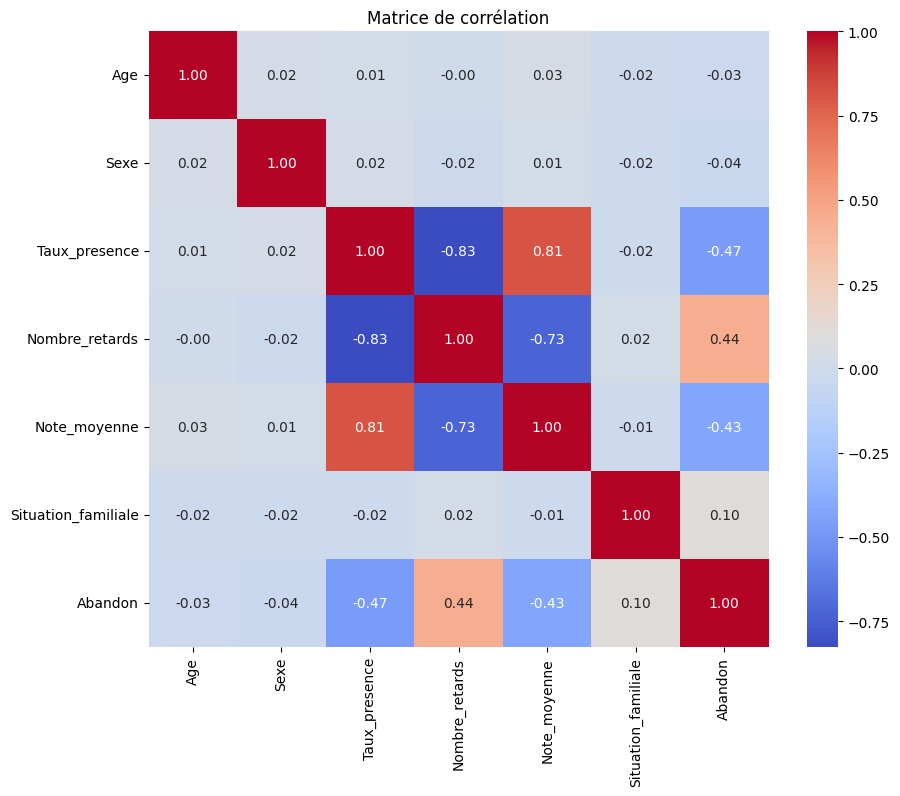

In [12]:
corr_matrix = df.corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

# explication :
Présence, retards, notes et abandon sont liés : une bonne présence et peu de retards sont associés à de meilleures notes et moins d’abandons.

Variables comme âge, sexe et situation familiale n’ont pas de corrélation linéaire marquée avec les autres indicateurs dans ce jeu de données.

In [45]:
# features and Target
X = df.drop(columns='Abandon', axis = 1)
Y = df['Abandon']

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
X_scaled = scaler.transform(X)
print(X_scaled)

[[ 0.2022062  -1.01106117  0.62474888 -0.33197076  1.31901636  2.00746377]
 [-0.29461493  0.98905984 -1.75807589  0.2273734  -0.33815267 -0.7956041 ]
 [ 0.69902734 -1.01106117 -0.31743129 -0.89131491 -0.19609389  2.00746377]
 ...
 [-0.79143607 -1.01106117  0.31276925 -0.89131491  0.22128269 -0.7956041 ]
 [-0.29461493 -1.01106117 -0.10580208  0.2273734  -0.76279288 -0.7956041 ]
 [-0.79143607  0.98905984 -1.23094376  1.90540586 -2.19671015 -0.7956041 ]]
[[ 0.2022062  -1.01106117  0.62474888 -0.33197076  1.31901636  2.00746377]
 [-0.29461493  0.98905984 -1.75807589  0.2273734  -0.33815267 -0.7956041 ]
 [ 0.69902734 -1.01106117 -0.31743129 -0.89131491 -0.19609389  2.00746377]
 ...
 [-0.79143607 -1.01106117  0.31276925 -0.89131491  0.22128269 -0.7956041 ]
 [-0.29461493 -1.01106117 -0.10580208  0.2273734  -0.76279288 -0.7956041 ]
 [-0.79143607  0.98905984 -1.23094376  1.90540586 -2.19671015 -0.7956041 ]]


In [48]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

In [49]:
print(X_train.shape, X_train.shape, X_test.shape)

(1600, 6) (1600, 6) (400, 6)


# Choix du K de notre modèle KNN

In [61]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 14, 16],
    'p': [1, 2]
}

# 5. Lancer la recherche avec validation croisée
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
scores = pd.DataFrame(grid_search.cv_results_)

print(scores)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.004957      0.002555         0.041695        0.004573   
1        0.006319      0.002193         0.040486        0.010363   
2        0.005238      0.002939         0.056038        0.017315   
3        0.005495      0.002090         0.041545        0.007059   
4        0.007178      0.003406         0.055586        0.016004   
5        0.003708      0.000560         0.048854        0.004604   
6        0.009803      0.005457         0.048858        0.012538   
7        0.004163      0.000835         0.049580        0.011778   
8        0.009172      0.002702         0.079505        0.024099   
9        0.010884      0.004539         0.085538        0.013005   
10       0.004673      0.002173         0.046618        0.015071   
11       0.003279      0.000223         0.034386        0.003658   
12       0.003568      0.000264         0.039962        0.001729   
13       0.003899      0.000587         0.042274

In [62]:
print("Meilleurs hyperparamètres trouvés :", grid_search.best_params_)

Meilleurs hyperparamètres trouvés : {'n_neighbors': 16, 'p': 2}


Le graphe est difficile à interpréter, car K ne fait qu’augmenter

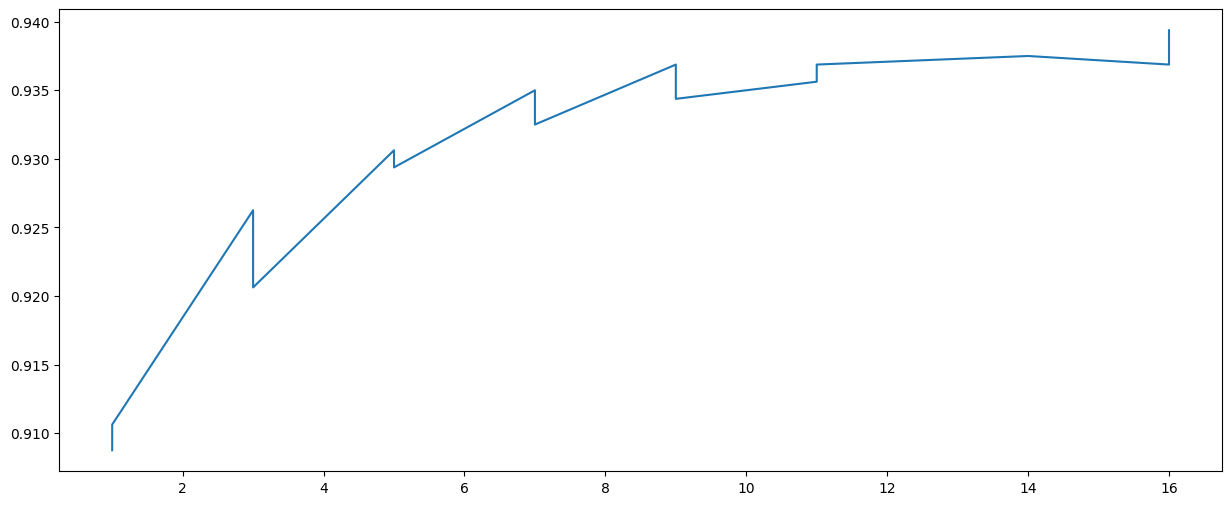

In [63]:
plt.figure(figsize=(15,6))
plt.plot(scores["param_n_neighbors"], scores["mean_test_score"])
plt.show()

# Application du modèle KNN (avec K=16)

In [64]:
classifier = KNeighborsClassifier(p=16)

In [65]:
classifier.fit(X_train, Y_train)

KNeighborsClassifier(p=16)

In [70]:
y_pred = classifier.predict(X_test)

In [72]:
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       366
           1       0.70      0.62      0.66        34

    accuracy                           0.94       400
   macro avg       0.83      0.80      0.81       400
weighted avg       0.94      0.94      0.94       400



Notre accuracy est de 94%

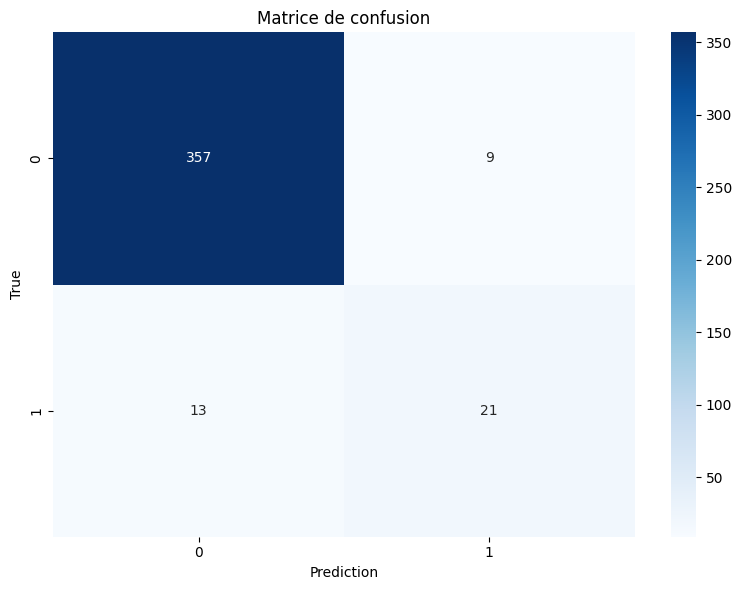

In [79]:
cm = confusion_matrix(Y_test, y_pred)

# Beautiful Confusion Matrix
plt.figure(figsize=(8,6))
seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.tight_layout()
plt.show()

D’après notre matrice de confusion, on obtient :

357 (TN) : le modèle a correctement prédit la classe des personnes qui n’ont pas abandonné.

9 (FP) : le modèle a prédit que les personnes avaient abandonné, alors qu’en réalité elles n’avaient pas abandonné.

13 (FN) : le modèle a prédit que les personnes n’avaient pas abandonné, alors qu’en réalité elles avaient abandonné.

21 (VP) : le modèle a correctement prédit la classe des personnes qui ont abandonné.

Conclusion :
Le modèle est très performant pour détecter la classe "n’a pas abandonné", mais il rencontre davantage de difficultés avec la classe "a abandonné".
Cela peut ne pas poser de problème si l’objectif principal est d’identifier les personnes qui n’abandonnent pas, par exemple pour optimiser les ressources ou adapter les actions de fidélisation.

# Utilisation de la PCA

In [83]:
pca_object = PCA()
principal_component_problem = pca_object.fit_transform(X_scaled)
explained_variance = pca_object.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

D'après notre graphe :

> les 3 à 4 premières composantes suffisent pour expliquer l'essentiel de la variance (entre 80% à 95%), on peut donc réduire notre dataset à 3 ou 4 dimensions sans perte trop d'information



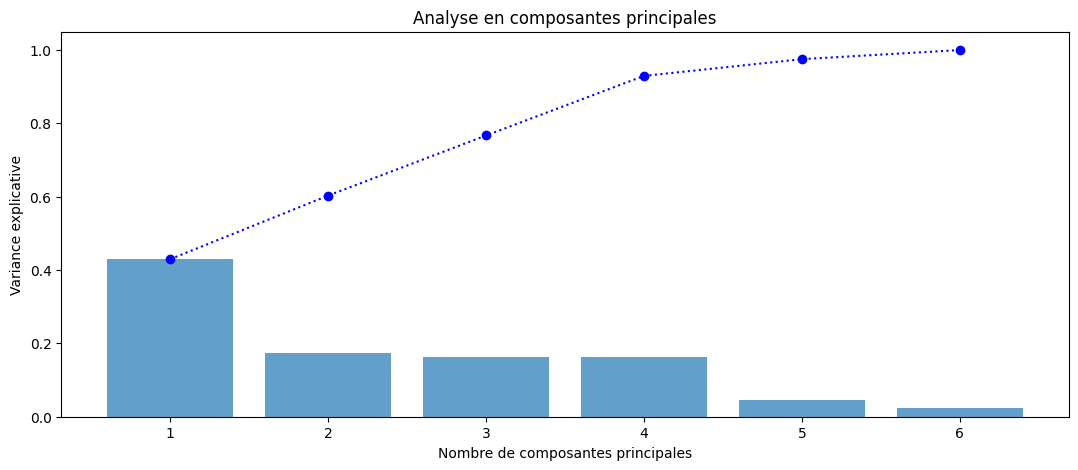

In [85]:
plt.figure(figsize=(13, 5))
plt.xticks(ticks=range(1, 21))
plt.bar(range(1,len(cumulative_variance) + 1), explained_variance,alpha=0.7,label='explained_variance')
plt.plot(range(1,len(cumulative_variance) + 1), cumulative_variance, "bo:", label='cumulative_variance')
plt.title("Analyse en composantes principales")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance explicative")
plt.show()

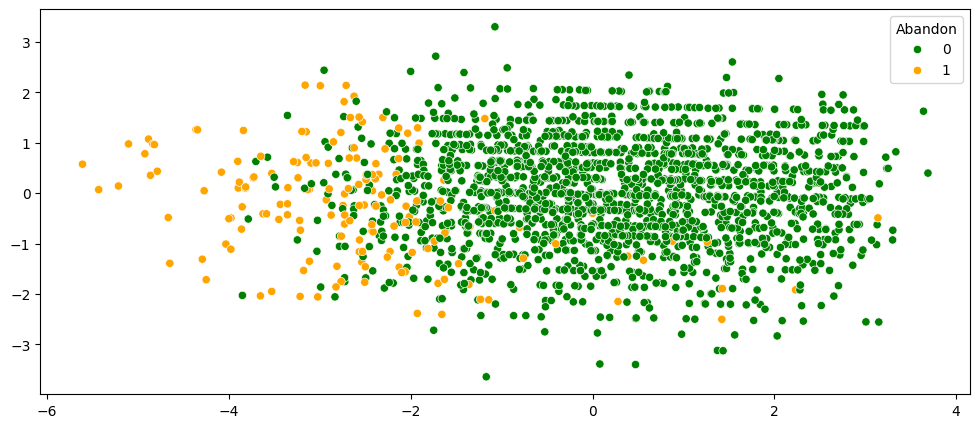

In [87]:
plt.figure(figsize=(12,5))
custom_palette = {0 : "green", 1:"orange", 2:"red"}
# Use the target variable Y for coloring the scatter plot points
seaborn.scatterplot(x=principal_component_problem[:, 0], y=principal_component_problem[:,1], hue=Y, palette=custom_palette)
plt.show()

In [88]:
X_train_pca_2d = pca_object.transform(X_train)[:, :2]
X_test_pca_2d = pca_object.transform(X_test)[:, :2]

In [96]:
classifier = KNeighborsClassifier(n_neighbors=16)
classifier.fit(X_train_pca_2d, Y_train)

KNeighborsClassifier(n_neighbors=16)

In [97]:
y_pred_pca_2d = classifier.predict(X_test_pca_2d)

In [99]:
print(classification_report(Y_test, y_pred_pca_2d))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       366
           1       0.87      0.38      0.53        34

    accuracy                           0.94       400
   macro avg       0.91      0.69      0.75       400
weighted avg       0.94      0.94      0.93       400



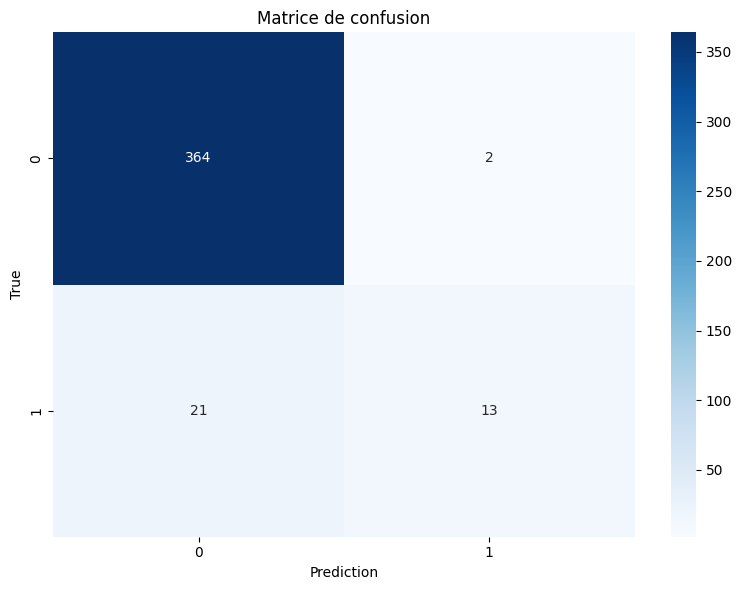

In [103]:
cm = confusion_matrix(Y_test, y_pred_pca_2d)

# Beautiful Confusion Matrix
plt.figure(figsize=(8,6))
seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.tight_layout()
plt.show()

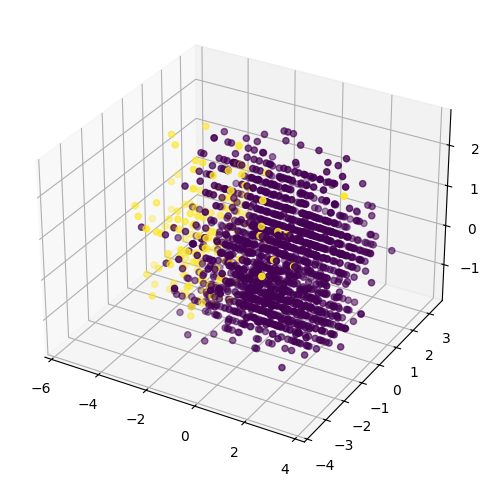

In [105]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(projection="3d")
ax.scatter(principal_component_problem[:, 0], principal_component_problem[:, 1], principal_component_problem[:, 2], c=Y)
plt.show()